In [56]:
import pandas as pd
import pickle

## Create the Master List for ALL Cars

This is where you go to bring all car make dataframes together for creating the master dataframes of all cars

**Step 1:** Unpickle all dfs for all car makes (47 total) 

Individual car make df must be created and its pickle listed here to bring it into the master car list

In [57]:
# Acura
with open('pickles/acura_dfs.pickle','rb') as read_file:
    acura_dfs = pickle.load(read_file)

In [58]:
# Audi
with open('pickles/audi_dfs.pickle','rb') as read_file:
    audi_dfs = pickle.load(read_file)

In [59]:
#BMW
with open('pickles/bmw_dfs.pickle','rb') as read_file:
    bmw_dfs = pickle.load(read_file)

**Step 2:** Pull all unpickled dfs together to create final list of all cars! 

In [60]:
# make a list of all car makes' dfs
make_dfs = [acura_dfs,audi_dfs,bmw_dfs]

# concatendate all car makes' dfs to create master list
all_cars_df = pd.concat(make_dfs, ignore_index=True)

**Step 3:** Verify everything looks good

In [61]:
all_cars_df.make.unique()

array(['Acura', 'Audi', 'BMW'], dtype=object)

In [62]:
all_cars_df.columns

Index(['year', 'make', 'model', 'capacity_liters', 'cylinders', 'transmission',
       'trans_speed', 'fuel_type', 'gg_emissions', 'mpg'],
      dtype='object')

In [63]:
all_cars_df.capacity_liters.unique()

array([2.2, 2.3, 3.2, 3. , 1.5, 2.4, 2. , 1.6, 1.8, 2.5, 2.7, 3.5, 3.7,
       2.8, 2.1, 5.2, 4.2, 2.9, 4. , 3.6, 4.4, 1.9, 4.9])

## ANALYSIS - Testing for now only

In [64]:
# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

import pandas.util.testing as tm

In [65]:
test_df = all_cars_df[['year','capacity_liters','cylinders','gg_emissions','mpg']]

In [66]:
# Examine correlations of the values

test_df.corr()

,year,capacity_liters,cylinders,gg_emissions,mpg
year,1.000000,0.164831,0.063949,-0.429302,0.434062
capacity_liters,0.164831,1.000000,0.962422,0.648618,-0.612750
cylinders,0.063949,0.962422,1.000000,0.710520,-0.675499
gg_emissions,-0.429302,0.648618,0.710520,1.000000,-0.968978
mpg,0.434062,-0.612750,-0.675499,-0.968978,1.000000


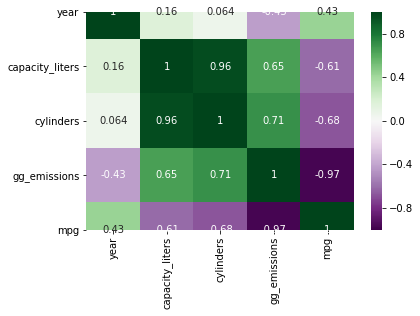

In [67]:
# Create heatmap of the correlations

sns.heatmap(test_df.corr(), cmap="PRGn", annot=True, vmin=-1, vmax=1);

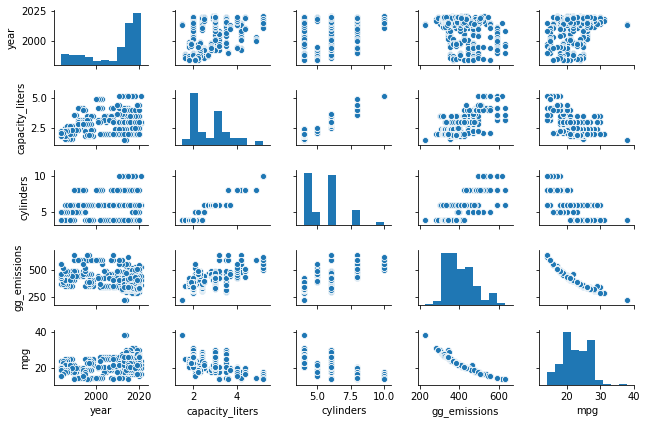

In [68]:
# Plot all of the car variable-to-variable relations as scatterplots

sns.pairplot(all_cars_df, height=1.2, aspect=1.5);

In [69]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('gg_emissions ~ capacity_liters + cylinders + year + mpg',
                       data=test_df, return_type="dataframe")

# Create car model
car_model = sm.OLS(y, X)

# Fit your model to your training set
car_fit = car_model.fit()

# Print summary statistics of the model's performance
car_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gg_emissions   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     2506.
Date:                Thu, 09 Jul 2020   Prob (F-statistic):               0.00
Time:                        00:34:30   Log-Likelihood:                -2331.0
No. Observations:                 549   AIC:                             4672.
Df Residuals:                     544   BIC:                             4693.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1867.0591    173.480     10.762      0.000    1526.287    2207.832
capacity_liters     5.6597      3.477      1.628      0.104      -1.170      12.489
cylinders           4.7998      1.969      2.437      0.015       0.932       8.668
year               -0.5679      0.090     -6.336      0.000      -0.744      -0.392
mpg               -15.9907      0.336    -47.580      0.000     -16.651     -15.330
==============================================================================
Omnibus:                      219.438   Durbin-Watson:                   0.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              847.902
Skew:                           1.836   Prob(JB):                    7.59e-185
Kurtosis:                       7.856   Cond. No.                     4.81e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

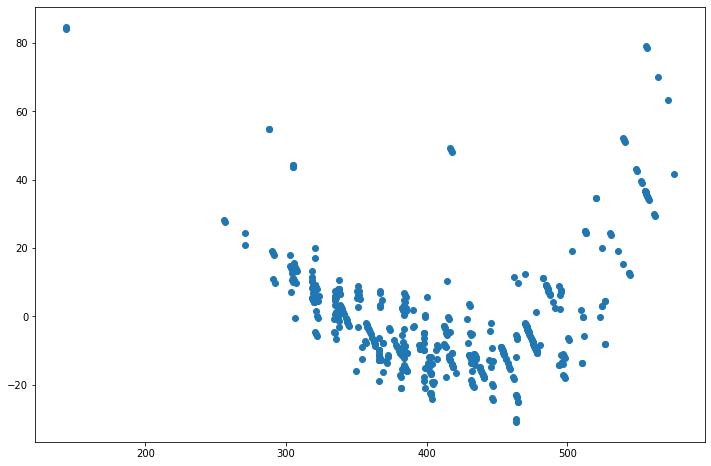

In [70]:
# Plot the residuals vs the fitted values

plt.figure(figsize=(12,8))
plt.scatter(car_fit.predict(), car_fit.resid);

In [71]:
# Using Sklearn to get R**2 value -- should be same as above

# Create an empty model
lr = LinearRegression()

# Choose the predictor variables, here all but the first which is the response variable
# This model is analogous to the Y ~ X1 + X2 + X3 + X4 + X5 + X6 model
X = test_df.loc[:, ['capacity_liters', 'cylinders', 'year', 'mpg']]

# Choose the response variable(s)
y = test_df.loc[:, ['gg_emissions']]

# Fit the model to the full dataset
lr.fit(X, y)

# Print out the R^2 for the model against the full dataset
lr.score(X,y)

0.9485155582273012

In [72]:
# use sklearn to find other intercept
lr.intercept_

array([1867.05907387])

In [73]:
# use sklearn to find other coefficients
lr.coef_

array([[  5.65972618,   4.79983983,  -0.56793354, -15.99066563]])